# Data Exploration and Preprocessing:

In [1]:
!pip install ppscore


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Installing required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps


In [3]:
# Reading dataset
df = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments\EDA2\adult_with_headers.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# Applying scaling techniques to numerical columns


# Split numerical and categorical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# 1) Standard scaling

scaler_standard = StandardScaler()
data_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[numerical_features]), 
                                    columns=numerical_features)





In [11]:
# Display the scaled DataFrame
print(data_standard_scaled)

            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours_per_week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3           -0.035429  
4           -0.

In [12]:
# 2) Min-Max Scaling

scaler_minmax = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[numerical_features]), 
                                   columns=numerical_features)

In [13]:
print(data_minmax_scaled)

            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404       0.733333      0.000000           0.0   
32557  0.315068  0.096500       0.533333      0.000000           0.0   
32558  0.561644  0.094827       0.533333      0.000000           0.0   
32559  0.068493  0.128499       0.533333      0.000000           0.0   
32560  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.397959  
4            0.

# Encoding Techniques:

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [15]:
# Apply One-Hot Encoding to categorical variables with less than 5 categories
for col in categorical_features:
    if df[col].nunique() < 5:
        one_hot_encoded = pd.get_dummies(df[col], prefix=col)
        final_df = pd.concat([df, one_hot_encoded], axis=1)
    else:
        # Apply Label Encoding for categorical variables with 5 or more categories
        df[col] = label_encoder.fit_transform(df[col])

In [16]:
print(df)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race      sex  capital_gain  capital_loss  \
0               1    

In [17]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


# 3. Feature Engineering: 

In [18]:
# Creating new features from existing ones, which can be beneficial for our modeling

df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df['hours_per_day'] = df['hours_per_week'] / 7

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_diff,hours_per_day
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K,2174,5.714286
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K,0,1.857143
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K,0,5.714286
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K,0,5.714286
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K,0,5.714286


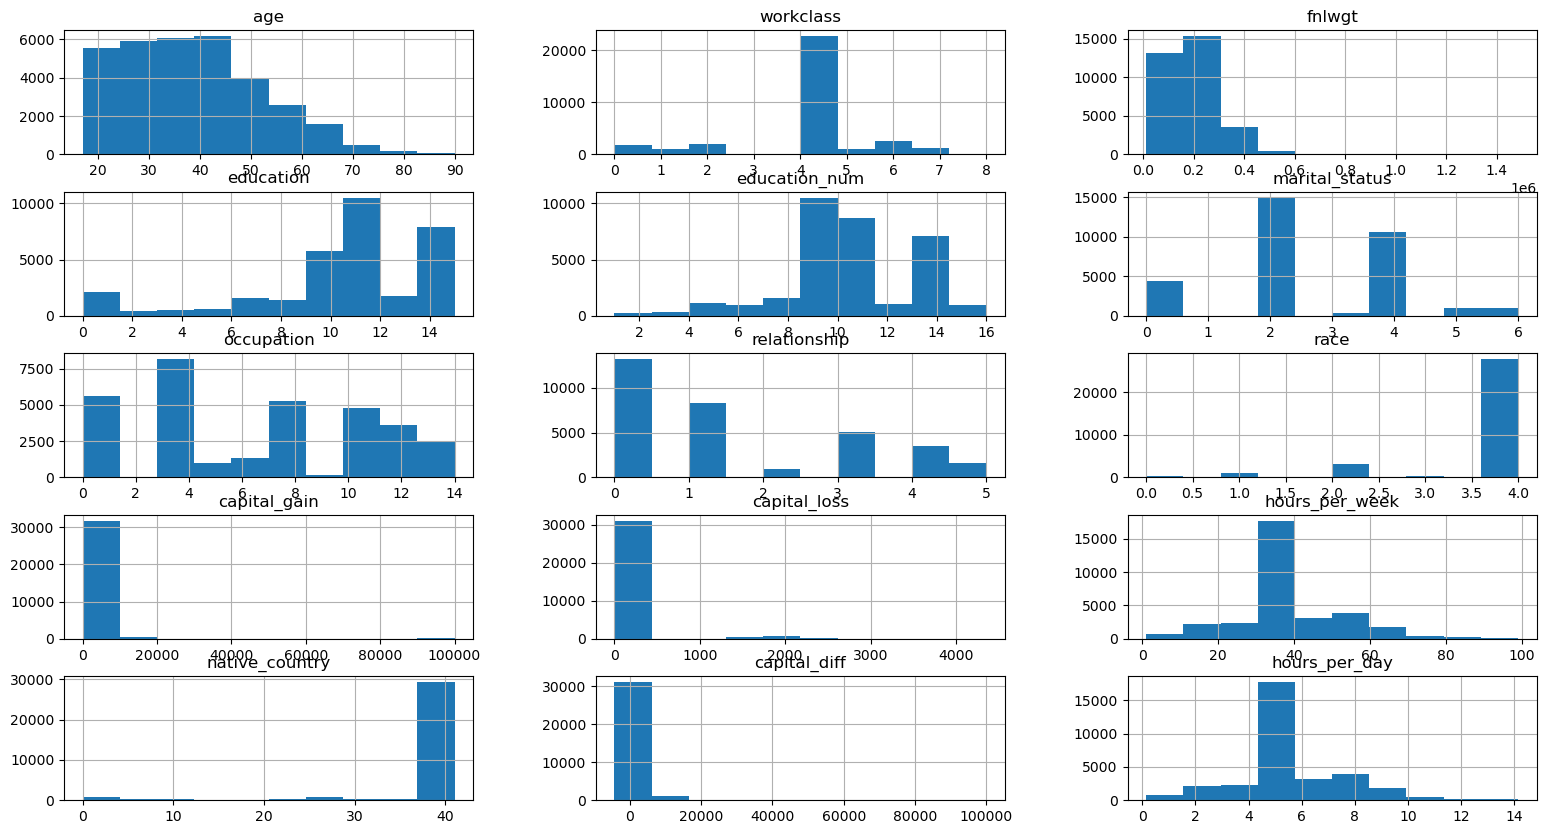

In [20]:
# Applying log transformation to one of skewed feature 

# First lets plot our data to see skeweness

df.hist(figsize=(19,10),layout=(5,3))
plt.show()

In [21]:
# Now we will be selecting 'fnlwgt' as it rightly skewed

df['log_fnlwgt'] = np.log1p(df['fnlwgt'])


<Axes: xlabel='log_fnlwgt', ylabel='Count'>

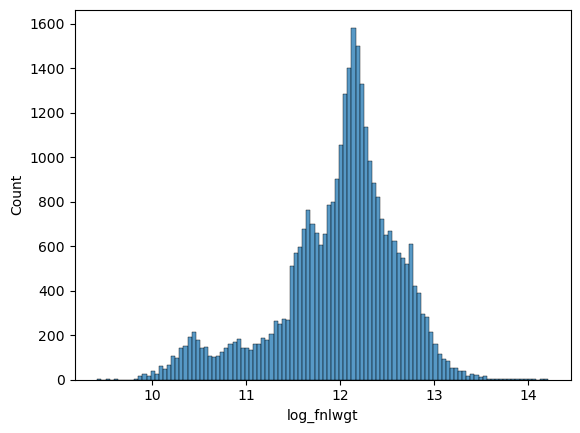

In [22]:
sns.histplot(df['log_fnlwgt'])

# 4. Feature Selection: 

In [23]:
# Isolation Forest for outlier detection

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[numerical_features])


In [24]:
# Counting  the number of outliers

num_outliers = sum(outliers == -1)
print(f"Number of outliers identified: {num_outliers}")

Number of outliers identified: 1628


In [25]:
# Removing outliers

df = df[outliers == 1]


C:\Users\sahil\AppData\Local\Temp\ipykernel_13796\3641376883.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(pps_matrix[['x', 'y', 'ppscore']].pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm')


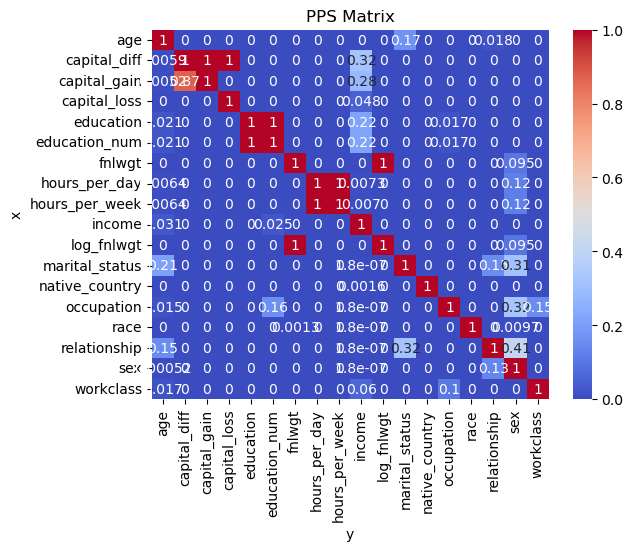

In [26]:
# Predictive Power Score (PPS) Analysis

pps_matrix = pps.matrix(df)
sns.heatmap(pps_matrix[['x', 'y', 'ppscore']].pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm')
plt.title('PPS Matrix')
plt.show()


C:\Users\sahil\AppData\Local\Temp\ipykernel_13796\3385986344.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


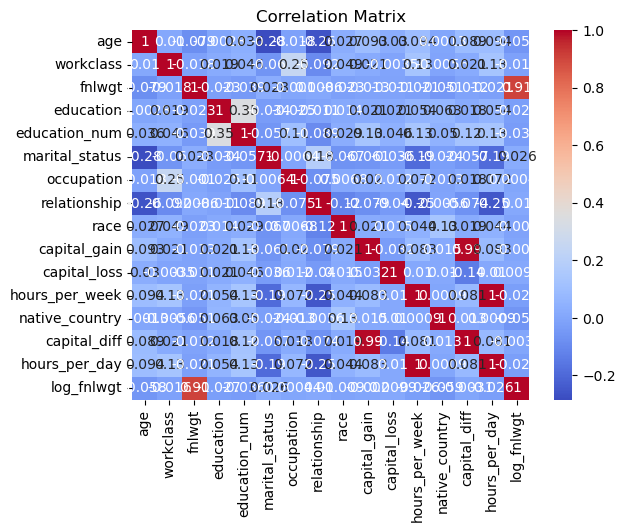

In [28]:
# Comparing PPS with Correlation Matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
